In [1]:
import math
import random
import urllib2
import warnings
warnings.filterwarnings('ignore')
import AT2_DP as student

In [2]:
import matplotlib.pyplot as plt
#import alg_project4_solution as student

In [3]:
# URLs for data files
PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"

In [4]:
def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict

In [5]:
def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq

In [6]:
def read_words(filename):
    """
    Load word list from the file named filename.

    Returns a list of strings.
    """
    # load assets
    word_file = urllib2.urlopen(filename)
    
    # read in files as string
    words = word_file.read()
    
    # template lines and solution lines list of line string
    word_list = words.split('\n')
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list

### Question 1 - Part 1
First, load the files HumanEyelessProtein and FruitflyEyelessProtein using the provided code. These files contain the amino acid sequences that form the eyeless proteins in the human and fruit fly genomes, respectively. Then load the scoring matrix PAM50 for sequences of amino acids. This scoring matrix is defined over the alphabet {𝙰,𝚁,𝙽,𝙳,𝙲,𝚀,𝙴,𝙶,𝙷,𝙸,𝙻,𝙺,𝙼,𝙵,𝙿,𝚂,𝚃,𝚆,𝚈,𝚅,𝙱,𝚉,𝚇,-} which represents all possible amino acids and gaps (the "dashes" in the alignment).

**Read in the HumanEyeless and the Fruitfly Eyeless Proteins**

In [169]:
# use the provided code to load the proteins into the respective variables
human = read_protein(HUMAN_EYELESS_URL)
fly = read_protein(FRUITFLY_EYELESS_URL)

In [170]:
# View the first 50 and last 50 characters in each of the sequences
print "Human", len(human)
print "  Fly", len(fly)

Human 422
  Fly 857


**Read in the Scoring Matrix PAM50 for the sequence of amino acids**

In [171]:
# use the provided code to load the Scoring Matrix
M = read_scoring_matrix(PAM50_URL)

In [10]:
# investigate the first few keys of the loaded scoring matrix
keys = M.keys()
for key in keys[0:3]:
    print key, M[key]
    print

- {'-': -100, 'A': -5, 'C': -5, 'B': -5, 'E': -5, 'D': -5, 'G': -5, 'F': -5, 'I': -5, 'H': -5, 'K': -5, 'M': -5, 'L': -5, 'N': -5, 'Q': -5, 'P': -5, 'S': -5, 'R': -5, 'T': -5, 'W': -5, 'V': -5, 'Y': -5, 'X': -5, 'Z': -5}

A {'-': -5, 'A': 5, 'C': -5, 'B': -2, 'E': -1, 'D': -2, 'G': -1, 'F': -7, 'I': -3, 'H': -5, 'K': -5, 'M': -4, 'L': -5, 'N': -2, 'Q': -3, 'P': 0, 'S': 0, 'R': -5, 'T': 0, 'W': -11, 'V': -1, 'Y': -6, 'X': -2, 'Z': -2}

C {'-': -5, 'A': -5, 'C': 9, 'B': -9, 'E': -11, 'D': -11, 'G': -7, 'F': -10, 'I': -5, 'H': -6, 'K': -11, 'M': -11, 'L': -12, 'N': -8, 'Q': -11, 'P': -6, 'S': -2, 'R': -6, 'T': -6, 'W': -13, 'V': -5, 'Y': -3, 'X': -7, 'Z': -11}



### Question 1 - Part 2

Next, compute the local alignments of the sequences of HumanEyelessProtein and FruitflyEyelessProtein using the PAM50 scoring matrix and enter the score and local alignments for these two sequences below. Be sure to clearly distinguish which alignment is which and include any dashes ('-') that might appear in the local alignment. This problem will be assessed according to the following two items:
- Is the score of the local alignment correct? (Hint: The sum of the decimal digits in the score is 20.)

- Are the two sequences in the local alignments (with dashes included if inserted by the algorithm) clearly distinguished and correct?

In [11]:
S = student.compute_alignment_matrix(human, fly, M, 0)

In [12]:
score1, human_local1, fly_local1 = student.compute_local_alignment(human, fly, M, S)

In [13]:
score1

875

In [203]:
print human_local1

HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ


In [15]:
print fly_local1

HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


### Question 2 - Part 1
To continue our investigation, we next consider the similarity of the two sequences in the local alignment computed in Question 1 to a third sequence. The file ConsensusPAXDomain contains a "consensus" sequence of the PAX domain; that is, the sequence of amino acids in the PAX domain in any organism. In this problem, we will compare each of the two sequences of the local alignment computed in Question 1 to this consensus sequence to determine whether they correspond to the PAX domain.

** Load the file ConsensusPAXDomain **

In [16]:
# use the provided code to load the CONCENSUS PAX DOMAIN protein
pax = read_protein(CONSENSUS_PAX_URL)

In [17]:
# read the first and last 50 characaters of con
print pax[:50]
print
print pax[-50:]

GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCV

ATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR


### Quwestion 2 - Part 2
For each of the two sequences of the local alignment computed in Question 1, do the following:

1. Delete any dashes '-' present in the sequence.

2. Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.

3. Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of elements in these two sequences that agree.

** Remove the Dashes from the Human and Fly local pair alignments in Q1 **

In [18]:
# use the .join method of a list comprehension 
human_local2 = "".join([letter for letter in human_local1 if letter != "-"])

In [19]:
# look at new dashless local Human alignment 
print "Human"
print "Dashes:", human_local1
print
print "No Dashes:", human_local2

Human
Dashes: HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ

No Dashes: HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ


In [20]:
# Repeat for the fly protein
fly_local2  = "".join([letter for letter in fly_local1 if letter != "-"])

In [21]:
# look at new dashless local fly alignment
print "FLY"
print "Dashes:", fly_local1
print
print "No Dashes:", human_local2
print 

FLY
Dashes: HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ

No Dashes: HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ



** Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence **

In [22]:
# First compute the global alignment of the dash-less human sequence with the pax protein
score2_human, human_global1, pax_global1 = student.compute_global_alignment(human_local2, pax, M, S)

In [23]:
print M["A"]

{'-': -5, 'A': 5, 'C': -5, 'B': -2, 'E': -1, 'D': -2, 'G': -1, 'F': -7, 'I': -3, 'H': -5, 'K': -5, 'M': -4, 'L': -5, 'N': -2, 'Q': -3, 'P': 0, 'S': 0, 'R': -5, 'T': 0, 'W': -11, 'V': -1, 'Y': -6, 'X': -2, 'Z': -2}


In [24]:
score2_human

181

In [25]:
print "Human Global"
print "Length:", len(human_global1)
print human_global1

Human Global
Length: 253
------------------------H-S-GV------------------------N-----Q-L-G-G-V-F-V-N-G-R-P-LP-D-S-T-R-Q-K-I-V-E-L-A-H-S-G-AR-P-C-D-I-S-R-I-L-Q-V-S-N-G-C-V-S-K-I-L-G-R-Y-Y-E-T-G-S-I-R-P-R-A-I-G-G-S-K-P-R-VATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ


In [26]:
print "PAX Global 1 - with Human"
print pax_global1

PAX Global 1 - with Human
GHGGVNQLGGVFVNGRPLPDVVRQRI-V--ELAHQGVRPCDISRQLRVSHGCVSKILGRY-Y-E-T-G-S-I-K-P-G-V-I--GGS-K-P-K-V-A-T-P-K-V-V-E-K-IA-E-Y-K-R-Q-N-P-T-M-F-A-W-E-I-R-D-R-L-L-A-E-R-V-C-D-N-D-T-V-P-S-V-S-S-I-N-R-I-I-R-----------------------------------------------------------


In [27]:
# Next compute the global alignment of the dash-less human sequence with the pax protein
score2_fly, fly_global1, pax_global2  = student.compute_global_alignment(fly_local2, pax, M, S)

In [28]:
score2_fly

176

In [29]:
print "Fly Global"
print "Length", len(fly_global1)
print fly_global1[110:120]
print pax_global2[110:120]


Fly Global
Length 254
-G-AR-P-C-
K-IA-E-Y-K


In [30]:
print "Pax Global2 - with Fly"
print "Length:", len(pax_global2)
print pax_global2

Pax Global2 - with Fly
Length: 254
GHGGVNQLGGVFVNGRPLPDVVRQRI-V--ELAHQGVRPCDISRQLRVSHGCVSKILGRY-Y-E-T-G-S-I-K-P-G-V-I--GGS-K-P-K-V-A-T-P-K-V-V-E-K-IA-E-Y-K-R-Q-N-P-T-M-F-A-W-E-I-R-D-R-L-L-A-E-R-V-C-D-N-D-T-V-P-S-V-S-S-I-N-R-I-I-R------------------------------------------------------------


** Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of elements in these two sequences that agree. **

In [31]:
len(list(set(human_global1)))

20

In [32]:
# Compute the percentage of elements that agree between the Human and Pax Global sequences
hp_counter = 0
for idx in range(len(pax_global1)):
    if human_global1[idx] == pax_global1[idx]:
        hp_counter += 1
        print idx
print hp_counter
hp_ans = (float(hp_counter) / len(human_global1)) * 100
print "Human Global and PAX Global: Percentage of Elements that agree between "
print str(hp_ans) + "%"

113
1
Human Global and PAX Global: Percentage of Elements that agree between 
0.395256916996%


In [33]:
# Compute the percentage of elements that agree between the Fly and Pax Global sequences
fp_counter = 0
for idx in range(len(fly_global1)):
    if fly_global1[idx] == pax_global2[idx]:
        print idx
        fp_counter += 1
print "Counter:", fp_counter
fp_ans = (float(fp_counter) / len(fly_global1)) * 100
print "FLy Global and PAX Global: Percentage of Elements that agree"
print str(fp_ans) + "%"

113
Counter: 1
FLy Global and PAX Global: Percentage of Elements that agree
0.393700787402%


### Question 3 - Part 1
Examine your answers to Questions 1 and 2. Is it likely that the level of similarity exhibited by the answers could have been due to chance? In particular, if you were comparing two random sequences of amino acids of length similar to that of HumanEyelessProtein and FruitflyEyelessProtein, would the level of agreement in these answers be likely? To help you in your analysis, there are 23 amino acids with symbols in the string ("𝙰𝙲𝙱𝙴𝙳𝙶𝙵𝙸𝙷𝙺𝙼𝙻𝙽𝚀𝙿𝚂𝚁𝚃𝚆𝚅𝚈𝚇𝚉"). Include a short justification for your answer.

**It is possible that the similarity is due to chance.  There is a one in 23 probability (~4%) that at any two elements in each of the two sequences will match.  The global fly sequence is 254 letters along and the global human sequence is 253 letters long.  In each case, given a 4% probablity of matching letters in the global pax concensus alignment, there should be approximately 10 or 11 letters that match in each case.  However, the two sequences we computed only have one each letter each that match the corresponding Global Pax Alignment.  For this reason, it is quite possible, even likely, that the similiartiy observed is due to chance.**

### Question 4 - Part 1
Write a function 𝚐𝚎𝚗𝚎𝚛𝚊𝚝𝚎_𝚗𝚞𝚕𝚕_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗(𝚜𝚎𝚚_𝚡, 𝚜𝚎𝚚_𝚢, 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡, 𝚗𝚞𝚖_𝚝𝚛𝚒𝚊𝚕𝚜) that takes as input two sequences 𝚜𝚎𝚚_𝚡 and 𝚜𝚎𝚚_𝚢, a scoring matrix 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡, and a number of trials 𝚗𝚞𝚖_𝚝𝚛𝚒𝚊𝚕𝚜. This function should return a dictionary 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 that represents an un-normalized distribution generated by performing the following process 𝚗𝚞𝚖_𝚝𝚛𝚒𝚊𝚕𝚜 times:

1. Generate a random permutation 𝚛𝚊𝚗𝚍_𝚢 of the sequence 𝚜𝚎𝚚_𝚢 using 𝚛𝚊𝚗𝚍𝚘𝚖.𝚜𝚑𝚞𝚏𝚏𝚕𝚎().
2. Compute the maximum value 𝚜𝚌𝚘𝚛𝚎 for the local alignment of 𝚜𝚎𝚚_𝚡 and 𝚛𝚊𝚗𝚍_𝚢 using the score matrix 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡.
3. Increment the entry 𝚜𝚌𝚘𝚛𝚎 in the dictionary 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 by one.

In [34]:
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials):
    scoring_distribution = {}
    for trial in range(num_trials):
        rand_y = "".join(random.sample(seq_y, len(seq_y)))
        _S_ = student.compute_alignment_matrix(seq_x, rand_y, scoring_matrix, 0)
        max_score = 0
        for _row_idx in range(len((_S_))-1,0,-1):
            current_score = max(_S_[_row_idx])
            if current_score > max_score:
                max_score = current_score
        scoring_distribution[max_score] = scoring_distribution.get(max_score,0) + 1
    return scoring_distribution

In [35]:
%time score_dist = generate_null_distribution(human,fly, M, 1000)

CPU times: user 9min, sys: 4.73 s, total: 9min 5s
Wall time: 9min 2s


In [53]:
print score_dist

{39: 2, 40: 4, 41: 11, 42: 23, 43: 26, 44: 39, 45: 42, 46: 63, 47: 65, 48: 64, 49: 64, 50: 62, 51: 67, 52: 63, 53: 60, 54: 52, 55: 54, 56: 40, 57: 32, 58: 35, 59: 20, 60: 13, 61: 10, 62: 12, 63: 15, 64: 16, 65: 8, 66: 7, 67: 5, 68: 4, 69: 5, 70: 4, 71: 2, 72: 2, 73: 1, 74: 1, 75: 2, 76: 1, 77: 1, 78: 1, 79: 2}


In [58]:
# create a copy of the key,value pairs
test = score_dist.items()

In [140]:
scores = score_dist.keys()
print scores

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [127]:
count = score_dist.values()

In [143]:
print [each/1000. for each in count]

[0.002, 0.004, 0.011, 0.023, 0.026, 0.039, 0.042, 0.063, 0.065, 0.064, 0.064, 0.062, 0.067, 0.063, 0.06, 0.052, 0.054, 0.04, 0.032, 0.035, 0.02, 0.013, 0.01, 0.012, 0.015, 0.016, 0.008, 0.007, 0.005, 0.004, 0.005, 0.004, 0.002, 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.002]


In [128]:
print count

[2, 4, 11, 23, 26, 39, 42, 63, 65, 64, 64, 62, 67, 63, 60, 52, 54, 40, 32, 35, 20, 13, 10, 12, 15, 16, 8, 7, 5, 4, 5, 4, 2, 2, 1, 1, 2, 1, 1, 1, 2]


In [149]:
norm_count = [each/1000. for each in count]

In [151]:
print norm_count

[0.002, 0.004, 0.011, 0.023, 0.026, 0.039, 0.042, 0.063, 0.065, 0.064, 0.064, 0.062, 0.067, 0.063, 0.06, 0.052, 0.054, 0.04, 0.032, 0.035, 0.02, 0.013, 0.01, 0.012, 0.015, 0.016, 0.008, 0.007, 0.005, 0.004, 0.005, 0.004, 0.002, 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.002]


In [59]:
# sort the copy of hte items in a new list
test_sorted = sorted(test, key=lambda x: (x[1] * -1, x[0]))

In [69]:
# print the sorted list (may have to reverse the list based on sorted order)
print test_sorted

[(78, 1), (77, 1), (76, 1), (74, 1), (73, 1), (79, 2), (75, 2), (72, 2), (71, 2), (39, 2), (70, 4), (68, 4), (40, 4), (69, 5), (67, 5), (66, 7), (65, 8), (61, 10), (41, 11), (62, 12), (60, 13), (63, 15), (64, 16), (59, 20), (42, 23), (43, 26), (57, 32), (58, 35), (44, 39), (56, 40), (45, 42), (54, 52), (55, 54), (53, 60), (50, 62), (52, 63), (46, 63), (49, 64), (48, 64), (47, 65), (51, 67)]


In [136]:
total_trials = 1000.
dist_normed_scores = []
dist_fraction_trials = []
for k,v in test_sorted:
    _num_trials = v
    _score = k
    dist_normed_scores.append(_score)
    norm_num_trials = _num_trials/total_trials
    dist_fraction_trials.append(norm_num_trials)

In [137]:
print score_dist.keys()
print len(score_dist.keys())

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
41


In [138]:
print dist_fraction_trials
print len(dist_fraction_trials)

[0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.004, 0.004, 0.005, 0.005, 0.007, 0.008, 0.01, 0.011, 0.012, 0.013, 0.015, 0.016, 0.02, 0.023, 0.026, 0.032, 0.035, 0.039, 0.04, 0.042, 0.052, 0.054, 0.06, 0.062, 0.063, 0.063, 0.064, 0.064, 0.065, 0.067]
41


In [98]:
print dist_fraction_trials
print dist_normed_scores

[0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.004, 0.004, 0.005, 0.005, 0.007, 0.008, 0.01, 0.011, 0.012, 0.013, 0.015, 0.016, 0.02, 0.023, 0.026, 0.032, 0.035, 0.039, 0.04, 0.042, 0.052, 0.054, 0.06, 0.062, 0.063, 0.063, 0.064, 0.064, 0.065, 0.067]
[78, 77, 76, 74, 73, 79, 75, 72, 71, 39, 70, 68, 40, 69, 67, 66, 65, 61, 41, 62, 60, 63, 64, 59, 42, 43, 57, 58, 44, 56, 45, 54, 55, 53, 50, 52, 46, 49, 48, 47, 51]


### Question 4 - Part 2
Next, create a bar plot of the normalized version of this distribution using 𝚙𝚕𝚝.𝚋𝚊𝚛 in 𝚖𝚊𝚝𝚙𝚕𝚘𝚝𝚕𝚒𝚋 (or your favorite plotting tool). (You will probably find CodeSkulptor too slow to do the required number of trials.) 

1. The horizontal axis should be the scores
2. The vertical axis should be the fraction of total trials corresponding to each score. 
3. As usual, choose reasonable labels for the axes and title. Note: You may wish to save the distribution that you compute in this Question for later use in Question 5.

In [77]:
%matplotlib inline

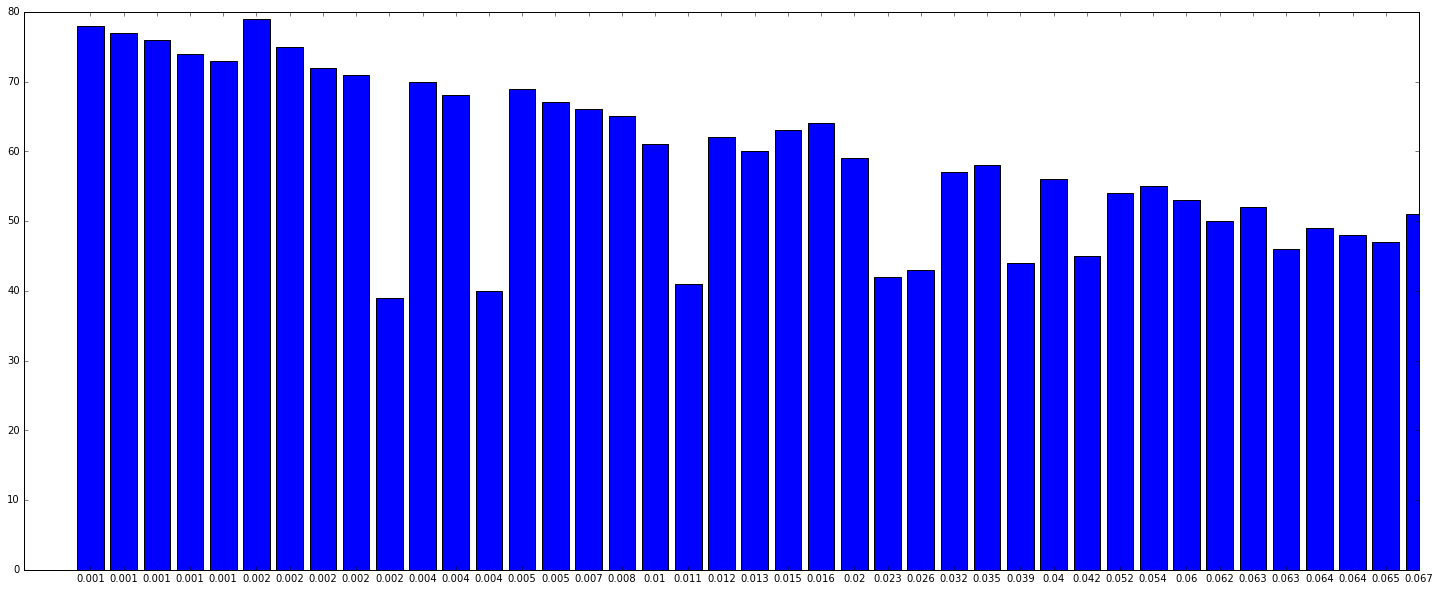

In [100]:
# create bar plot
plt.figure(figsize=(25,10))
#plt.bar(range(len(dist_normed_scores)), dist_normed_scores, align = 'center')
plt.bar(range(len(dist_normed_scores)), dist_normed_scores, align = 'center')
plt.xlim([-2,2])
plt.xticks(range(len(dist_fraction_trials)), dist_fraction_trials)
plt.show()

In [182]:
print len(scores)

41


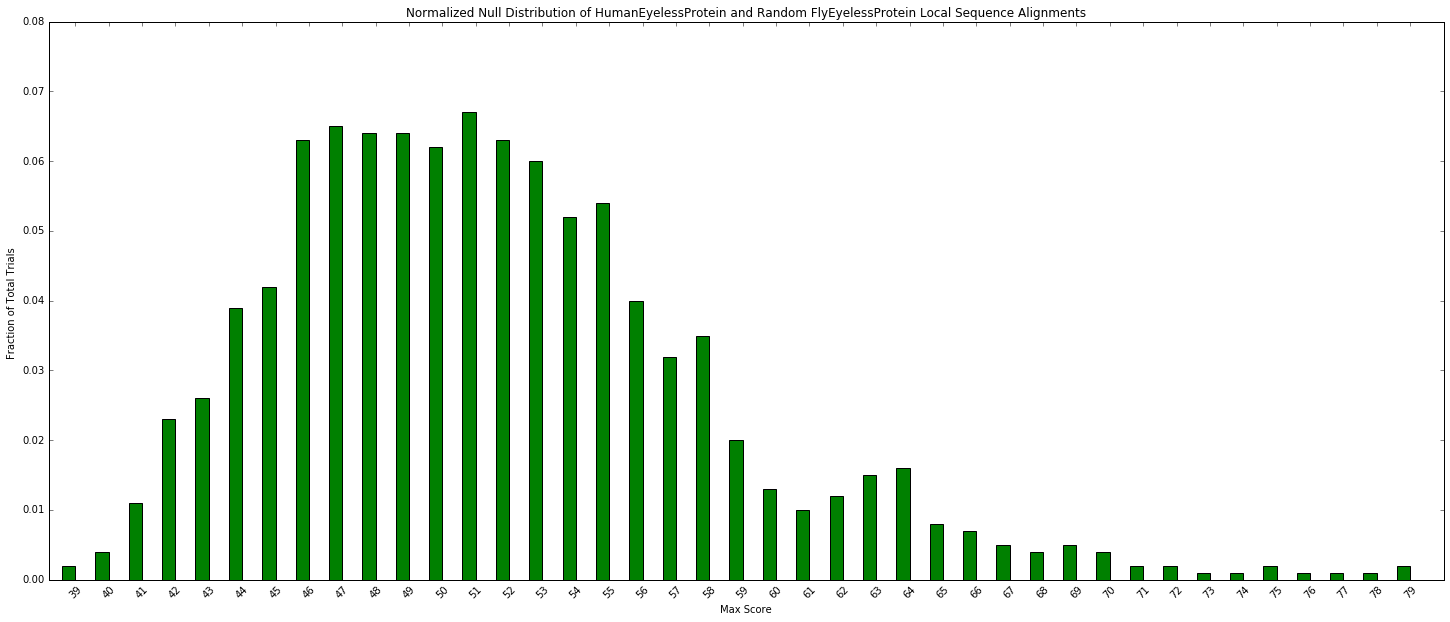

In [157]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

## the data
N = 41
scores = [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
norm_count = [0.002, 0.004, 0.011, 0.023, 0.026, 0.039, 0.042, 0.063, 0.065, 0.064, 0.064, 0.062, 0.067, 0.063, 0.06, 0.052, 0.054, 0.04, 0.032, 0.035, 0.02, 0.013, 0.01, 0.012, 0.015, 0.016, 0.008, 0.007, 0.005, 0.004, 0.005, 0.004, 0.002, 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.002]
x_axis_scores = score_dist.keys()
y_axis_trial_fract = [number/1000. for number in score_dist.values()]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.40                      # the width of the bars

## the bars
#ax.bar(ind, y_axis_trial_fract, width,
#                color='green')
ax.bar(ind, norm_count, width,
                color='green')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.08,)
ax.set_xlabel('Max Score')
ax.set_ylabel("Fraction of Total Trials ")
ax.set_title('Normalized Null Distribution of HumanEyelessProtein and Random FlyEyelessProtein Local Sequence Alignments')
#xTickMarks = x_axis_scores
xTickMarks = scores
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)

#yTickMark
#ax.set_yticks()
plt.setp(xtickNames, rotation=45, fontsize=10)


## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

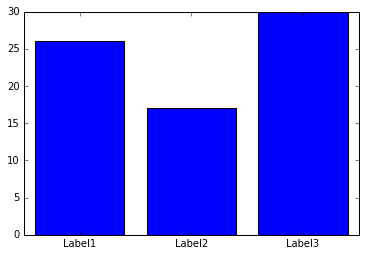

In [269]:
D = {u'Label1':26, u'Label2': 17, u'Label3':30}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()

In [240]:
scores = score_dist_norm.keys()
print scores[0:10]

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [ ]:
plt.boxplot(score_dist_norm.values(), score_dist_norm.keys())
#plt.bar(D.keys(), D.values(), align='center')
#plt.xticks(range(len(D)), D.keys())
plt.plt()

In [235]:
score_dist_norm.values()

[0.002,
 0.008,
 0.02,
 0.015,
 0.026,
 0.04,
 0.059,
 0.07,
 0.081,
 0.065,
 0.067,
 0.076,
 0.062,
 0.056,
 0.05,
 0.04,
 0.046,
 0.029,
 0.034,
 0.03,
 0.019,
 0.018,
 0.017,
 0.012,
 0.007,
 0.01,
 0.01,
 0.009,
 0.004,
 0.004,
 0.001,
 0.001,
 0.004,
 0.003,
 0.001,
 0.001,
 0.002,
 0.001]

In [238]:
print score_dist_norm.keys()

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 78, 83, 105]


In [231]:
print score_dist.items()

[(39, 2), (40, 8), (41, 20), (42, 15), (43, 26), (44, 40), (45, 59), (46, 70), (47, 81), (48, 65), (49, 67), (50, 76), (51, 62), (52, 56), (53, 50), (54, 40), (55, 46), (56, 29), (57, 34), (58, 30), (59, 19), (60, 18), (61, 17), (62, 12), (63, 7), (64, 10), (65, 10), (66, 9), (67, 4), (68, 4), (69, 1), (70, 1), (71, 4), (72, 3), (76, 1), (78, 1), (83, 2), (105, 1)]


In [187]:
alphabet = string.letters[0:26]

In [196]:
import string
alphabet = string.letters[0:26]
x = ""
for dummy in range(857):
    temp = alphabet[random.sample(range(26),1)[0]]
    x += temp
x

'KGXEPRVCBFQHATRXMFAYYFZQHRFWAARDSLTHZDKZUXQOIIDSGWWVFWAYRDDKMOYOQOYNVRABLGMVYORNLPYFXEEVXNMXUUFPULVGYDQDUGPLMSTACFZASKPMWMGQQNTECHGPQNQAKPSSWMEYVSJELJPBFIJBPJFAMERUTTDLJAOLXIYJASFYBQXTPQPDJKMALVRTYRVLLXXEGTJNHVCHFJUQLNPKPAMTOCVDFVRQNGJCYYXIVSCLPCNZCPKFNJNECEYFLZEEBMHHYVYXGVEEFFCPRRWBEASEVWPXFMABXWNYSACTKWURKWMONJCXDLZPIOBQRMZEXFSFBNZBAWLXAKAMERTQDENGOUVQLUUVMQFBPOIIJIJKYGGIOOZEIBCRYFCHWHCVYHVGCCIQDCVLIPBAIBBKNCEFDSOYDUWDAAPMAOTJUAOKJRXSYHONELISYVCYURVBUSLHHBTFTMGOFKOYRWVTNXGADXPUUTAFZAKTJATCBZKOBQBMGZJWFGSAJGZMLFMUCSACDOIWXQXOAOLRGWCWRBCDDLFVXIMJLFMYMQBQRLVDVCHWWZDNGXKOGIVGPNENEPVXKFTCXINANPGHIUOOBXAUYNUMIBAQEQVPGPOBGGDJZUTZGENCQLDNHAEIIADGMCQXWIJXAMYEHTQYIRSOUKUEMRMSSBRNFSENMNBAPQTBBKWJPWDJSPWEIKUIELZQMQVUAJSTNQYWWWZWTHVYVPNRVVIPJKJCSEJZOPWUHSOOADCOPAQGGNXPXLTJUKCGNBECUUKOWEPUKVSBEXPYPCJWTBMUPRJYXPSCDIOSJHASFNCMRRTOYNFKHZBFNWXSIVXRSODXDEJKQGNLH'

In [194]:
alphabet[random.sample(range(26),1)[0]]

9

In [201]:
def use_shuffle(X, num_trials):
    for trial in range(num_trials):
        rand_x = ""
        temp_y = X[:]
        temp1_y = [[letter] for letter in X]
        random.shuffle(temp1_y)
        for letter in temp1_y:
            rand_x += letter[0]

In [205]:
%time use_shuffle(x, 10000)

CPU times: user 11.5 s, sys: 39.3 ms, total: 11.6 s
Wall time: 11.5 s


In [211]:
def use_sample(X, num_trials):
    for trial in range(num_trials):
        rand_y = "".join(random.sample(X, len(X)))

In [216]:
%time use_sample(x, 10000)

CPU times: user 5.18 s, sys: 39.7 ms, total: 5.22 s
Wall time: 5.2 s


In [133]:
z = [number/1000. for number in score_dist.values()]
z

[0.002,
 0.004,
 0.011,
 0.023,
 0.026,
 0.039,
 0.042,
 0.063,
 0.065,
 0.064,
 0.064,
 0.062,
 0.067,
 0.063,
 0.06,
 0.052,
 0.054,
 0.04,
 0.032,
 0.035,
 0.02,
 0.013,
 0.01,
 0.012,
 0.015,
 0.016,
 0.008,
 0.007,
 0.005,
 0.004,
 0.005,
 0.004,
 0.002,
 0.002,
 0.001,
 0.001,
 0.002,
 0.001,
 0.001,
 0.001,
 0.002]

In [159]:
print scores

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [160]:
print count

[2, 4, 11, 23, 26, 39, 42, 63, 65, 64, 64, 62, 67, 63, 60, 52, 54, 40, 32, 35, 20, 13, 10, 12, 15, 16, 8, 7, 5, 4, 5, 4, 2, 2, 1, 1, 2, 1, 1, 1, 2]


### Question 5 - Calcuate the Mean, Std Deviation and the Z score

In [202]:
total = 0
counter = 0
mean = 0
for score in scores:
#    print score
    counter += score_dist[score]
    current = score_dist[score] * score
    total += current
    mean = total / 1000.
print counter
print total
print "Mean", mean

1000
51854
Mean 51.854


In [175]:
std = 0
total_std = 0
for idx in range(len(scores)):
    for number in range(count[idx]):
#        print scores[idx]
        total_std += (scores[idx] - mean)**2
std = (total_std/1000.)**0.5
print "Std", std

Std 6.54527952039


In [181]:
print 

79


In [176]:
# z-score
z_score = (score1-mean)/std
print "Z-Score", z_score


Z-Score 125.761779529


### Question 6
For bell-shaped distributions such as the normal distribution, the likelihood that an observation will fall within three multiples of the standard deviation for such distributions is very high.

Based on your answers to Questions 4 and 5, is the score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein due to chance? As a concrete question, which is more likely: the similarity between the human eyeless protein and the fruitfly eyeless protein being due to chance or winning the jackpot in an extremely large lottery? Provide a short explanation for your answers.

In [184]:
stds_outside = (score1-mean)/std
stds_outside

125.76177952921185

** The Z-score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein is 125 over standard deviations above the mean.  Given that 99.7% of all observations will fall within just +/- 3 standard deviations of the mean, the statistical likelihood that the local alignment score of the two proteins is due to chance, is virtually zero.**

** The likelihood of winning the lottery is even far more likely than the simiarlity between the human eyeless protein and the fruitfly eyeless protein being due to chance.  For example, the odds of winning the Spanish Christmas Lottery are 1 in 99,999.  Even this extremely low likelihood results in a Z-score of about -3.86.  Again, given that the local protein alignments for Human and Fruitfly have a Z-Score of 125 indicates there is virtually zero chance the score is due to chance. **

In [195]:
check = 1./(99999)
check

1.000010000100001e-05

In [193]:
99999 * 180

17999820

In [199]:
pb = 1./(292*(10*6))
pb

5.7077625570776254e-05

In [197]:
10**6

1000000

In [179]:
1./99999

1.000010000100001e-05

In [187]:
import scipy.stats as st
17999820

0.94949741652589625

In [232]:
print 1./99999
print st.norm.ppf(1.0000100001e-05) 
#print a * 100
#1.6448536269514722
#print st.norm.cdf(z_score)
#0.94949741652589625

1.0000100001e-05
-4.26488856114
1.0


### Question 7

Spelling correction

Up to now, we have measured the similarity of two strings. In other applications, measuring the dissimilarity of two sequences is also useful. Given two strings, the **edit** distance corresponds to the minimum number of single character insertions, deletions, and substitutions that are needed to transform one string into another. In particular, if x and y are strings and a and b are characters, these edit operations have the form:

- Insert - Replace the string x+y by the string x+a+y.
- Delete - Replace the string x+a+y by the string x+y.
- Substitute - Replace the string x+a+y by the string x+b+y,

Not surprisingly, similarity between pairs of sequences and edit distances between pairs of strings are related. In particular, the edit distance for two strings x and y can be expressed in terms of the lengths of the two strings and their corresponding similarity score as follows:|x|+|y|−score(x,y) where score(x,y) is the score returned by the global alignment of these two strings using a very simple scoring matrix that can be computed using 𝚋𝚞𝚒𝚕𝚍_𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡.

Determine the values for 𝚍𝚒𝚊𝚐_𝚜𝚌𝚘𝚛𝚎, 𝚘𝚏𝚏_𝚍𝚒𝚊𝚐_𝚜𝚌𝚘𝚛𝚎, and 𝚍𝚊𝚜𝚑_𝚜𝚌𝚘𝚛𝚎 such that the score from the resulting global alignment yields the edit distance when substituted into the formula above. Be sure to indicate which values corresponds to which parameters. Finally, as a side note, be aware that there are alternative formulations of edit distance as a dynamic programming problem using different scoring matrices. For this problem, please restrict your consideration to the formulation used above.

In [215]:
x = "ATA"
y = "ACCA"

In [216]:
letters = set(["A","C","T","G"])
diag_score1 = 10
off_diag_score1 = 6
dash_score1 = -3

In [217]:
q7_M = student.build_scoring_matrix(letters, diag_score1, off_diag_score1, dash_score1)

In [218]:
q7_M

{'-': {'-': -3, 'A': -3, 'C': -3, 'G': -3, 'T': -3},
 'A': {'-': -3, 'A': 10, 'C': 6, 'G': 6, 'T': 6},
 'C': {'-': -3, 'A': 6, 'C': 10, 'G': 6, 'T': 6},
 'G': {'-': -3, 'A': 6, 'C': 6, 'G': 10, 'T': 6},
 'T': {'-': -3, 'A': 6, 'C': 6, 'G': 6, 'T': 10}}

In [219]:
q7_S = student.compute_alignment_matrix(x, y, q7_M, 1)

In [220]:
q7_S

[[0, -3, -6, -9, -12],
 [-3, 10, 7, 4, 1],
 [-6, 7, 16, 13, 10],
 [-9, 4, 13, 22, 23]]

In [222]:
student.compute_global_alignment(x, y, q7_M, q7_S)

(23, 'A-TA', 'ACCA')

In [362]:
a = 'HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ'
b = 'HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ'
a == b

True